<a href="https://colab.research.google.com/github/saurabhdaund76/Hotel-Booking-Analysis/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML projects/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [126]:
df.head()

,Yes,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [127]:
df.dtypes.reset_index(name='type')   # type of each column

,index,type
0,Yes,uint8
1,customerID,object
2,gender,object
3,SeniorCitizen,int64
4,Partner,object
5,Dependents,object
6,tenure,int64
7,PhoneService,object
8,MultipleLines,object
9,InternetService,object


In [128]:
df.head()

,Yes,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
df.shape

(7043, 22)

In [130]:
df_copy = df.copy()   # copy of the orignal dataset

In [131]:
df1 = pd.get_dummies(df , drop_first=True)

In [132]:
df.head()

,Yes,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.columns

Index(['Yes', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [134]:
df.dtypes.reset_index()

,index,0
0,Yes,uint8
1,customerID,object
2,gender,object
3,SeniorCitizen,int64
4,Partner,object
5,Dependents,object
6,tenure,int64
7,PhoneService,object
8,MultipleLines,object
9,InternetService,object


In [135]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [139]:
df.drop(['SeniorCitizen']  , axis= 1 , inplace= True)

In [137]:
# these 
df.drop(['customerID' ,'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges']  ,axis=1 ,inplace= True)

In [140]:
df.head()

,Yes,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,1,2,53.85,Yes
3,0,45,42.30,No
4,1,2,70.70,Yes


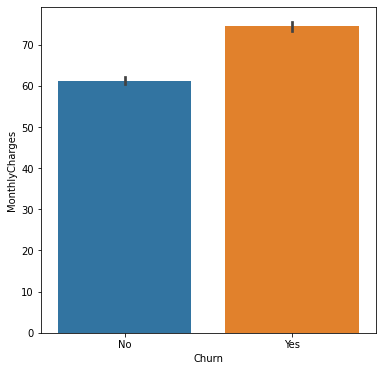

In [119]:
fig = plt.figure(figsize=(6,6))
ax= fig.gca()
sns.barplot(data = df , y='MonthlyCharges' , x= 'Churn')

here we can see there is a possibility that of monthly charges churn is increasing

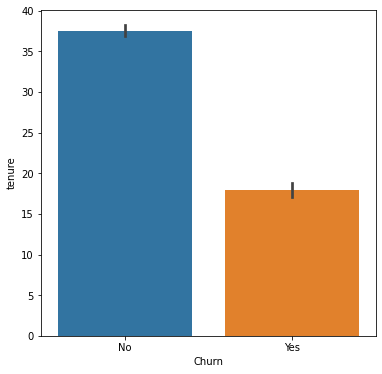

In [120]:
fig = plt.figure(figsize=(6,6))
ax= fig.gca()
sns.barplot(data = df , y='tenure' , x= 'Churn')

As we can see that More tenure means less churn 

In [121]:
df1 = pd.get_dummies(df['Churn'] , drop_first= True)

In [122]:
df1.head()

,Yes
0,0
1,0
2,1
3,0
4,1


In [124]:
df = pd.concat([df1,df] , axis=1)

In [141]:
df.head()

,Yes,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,1,2,53.85,Yes
3,0,45,42.30,No
4,1,2,70.70,Yes


In [144]:
df.rename(columns={'Yes':'Churn_yes'})

,Churn_yes,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,1,2,53.85,Yes
3,0,45,42.30,No
4,1,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [145]:
df.drop(['Churn'],  axis=1)

,Yes,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,1,2,53.85
3,0,45,42.30
4,1,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [148]:
X = df[['tenure','MonthlyCharges']].copy()
y = df['Yes'].copy()

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [152]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True , max_iter=10000)

clf.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
# model coef
clf.coef_

array([[-0.05646728,  0.03315385]])

In [154]:
clf.intercept_

array([-1.77408975])

In [155]:
# evaluting performance of trained model lets find predicted probablities

train_pred_prob = clf.predict_proba(X_train)
test__pred = clf.predict_proba(X_test)

In [156]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25
